# **Milestone1: Journey from Raw Data to Insights**

By: **Eva** (Computer Science), **Lihan** (Data Science), **Sean** (Psychology), & **Vickie** (Urban & Environmental Studies)

# **1. Problem Statement and Hypothesis** #


***Problem Statement:***

How do the **spatial Google search intensities for specific keywords related to obesity and exercise** correlate with the **actual obesity and exercise rates in the US**, respectively?


***Hypothesis:***

There are significant correlations between **spatial Google search intensities for specific keywords related to obesity and exercise** and the **actual obesity and exercise rates in the US**, respectively.

# **2. Dataset Examination and Variable Identification** #

In [ ]:
# Allow the notebook to use files stored in the user's Drive.
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


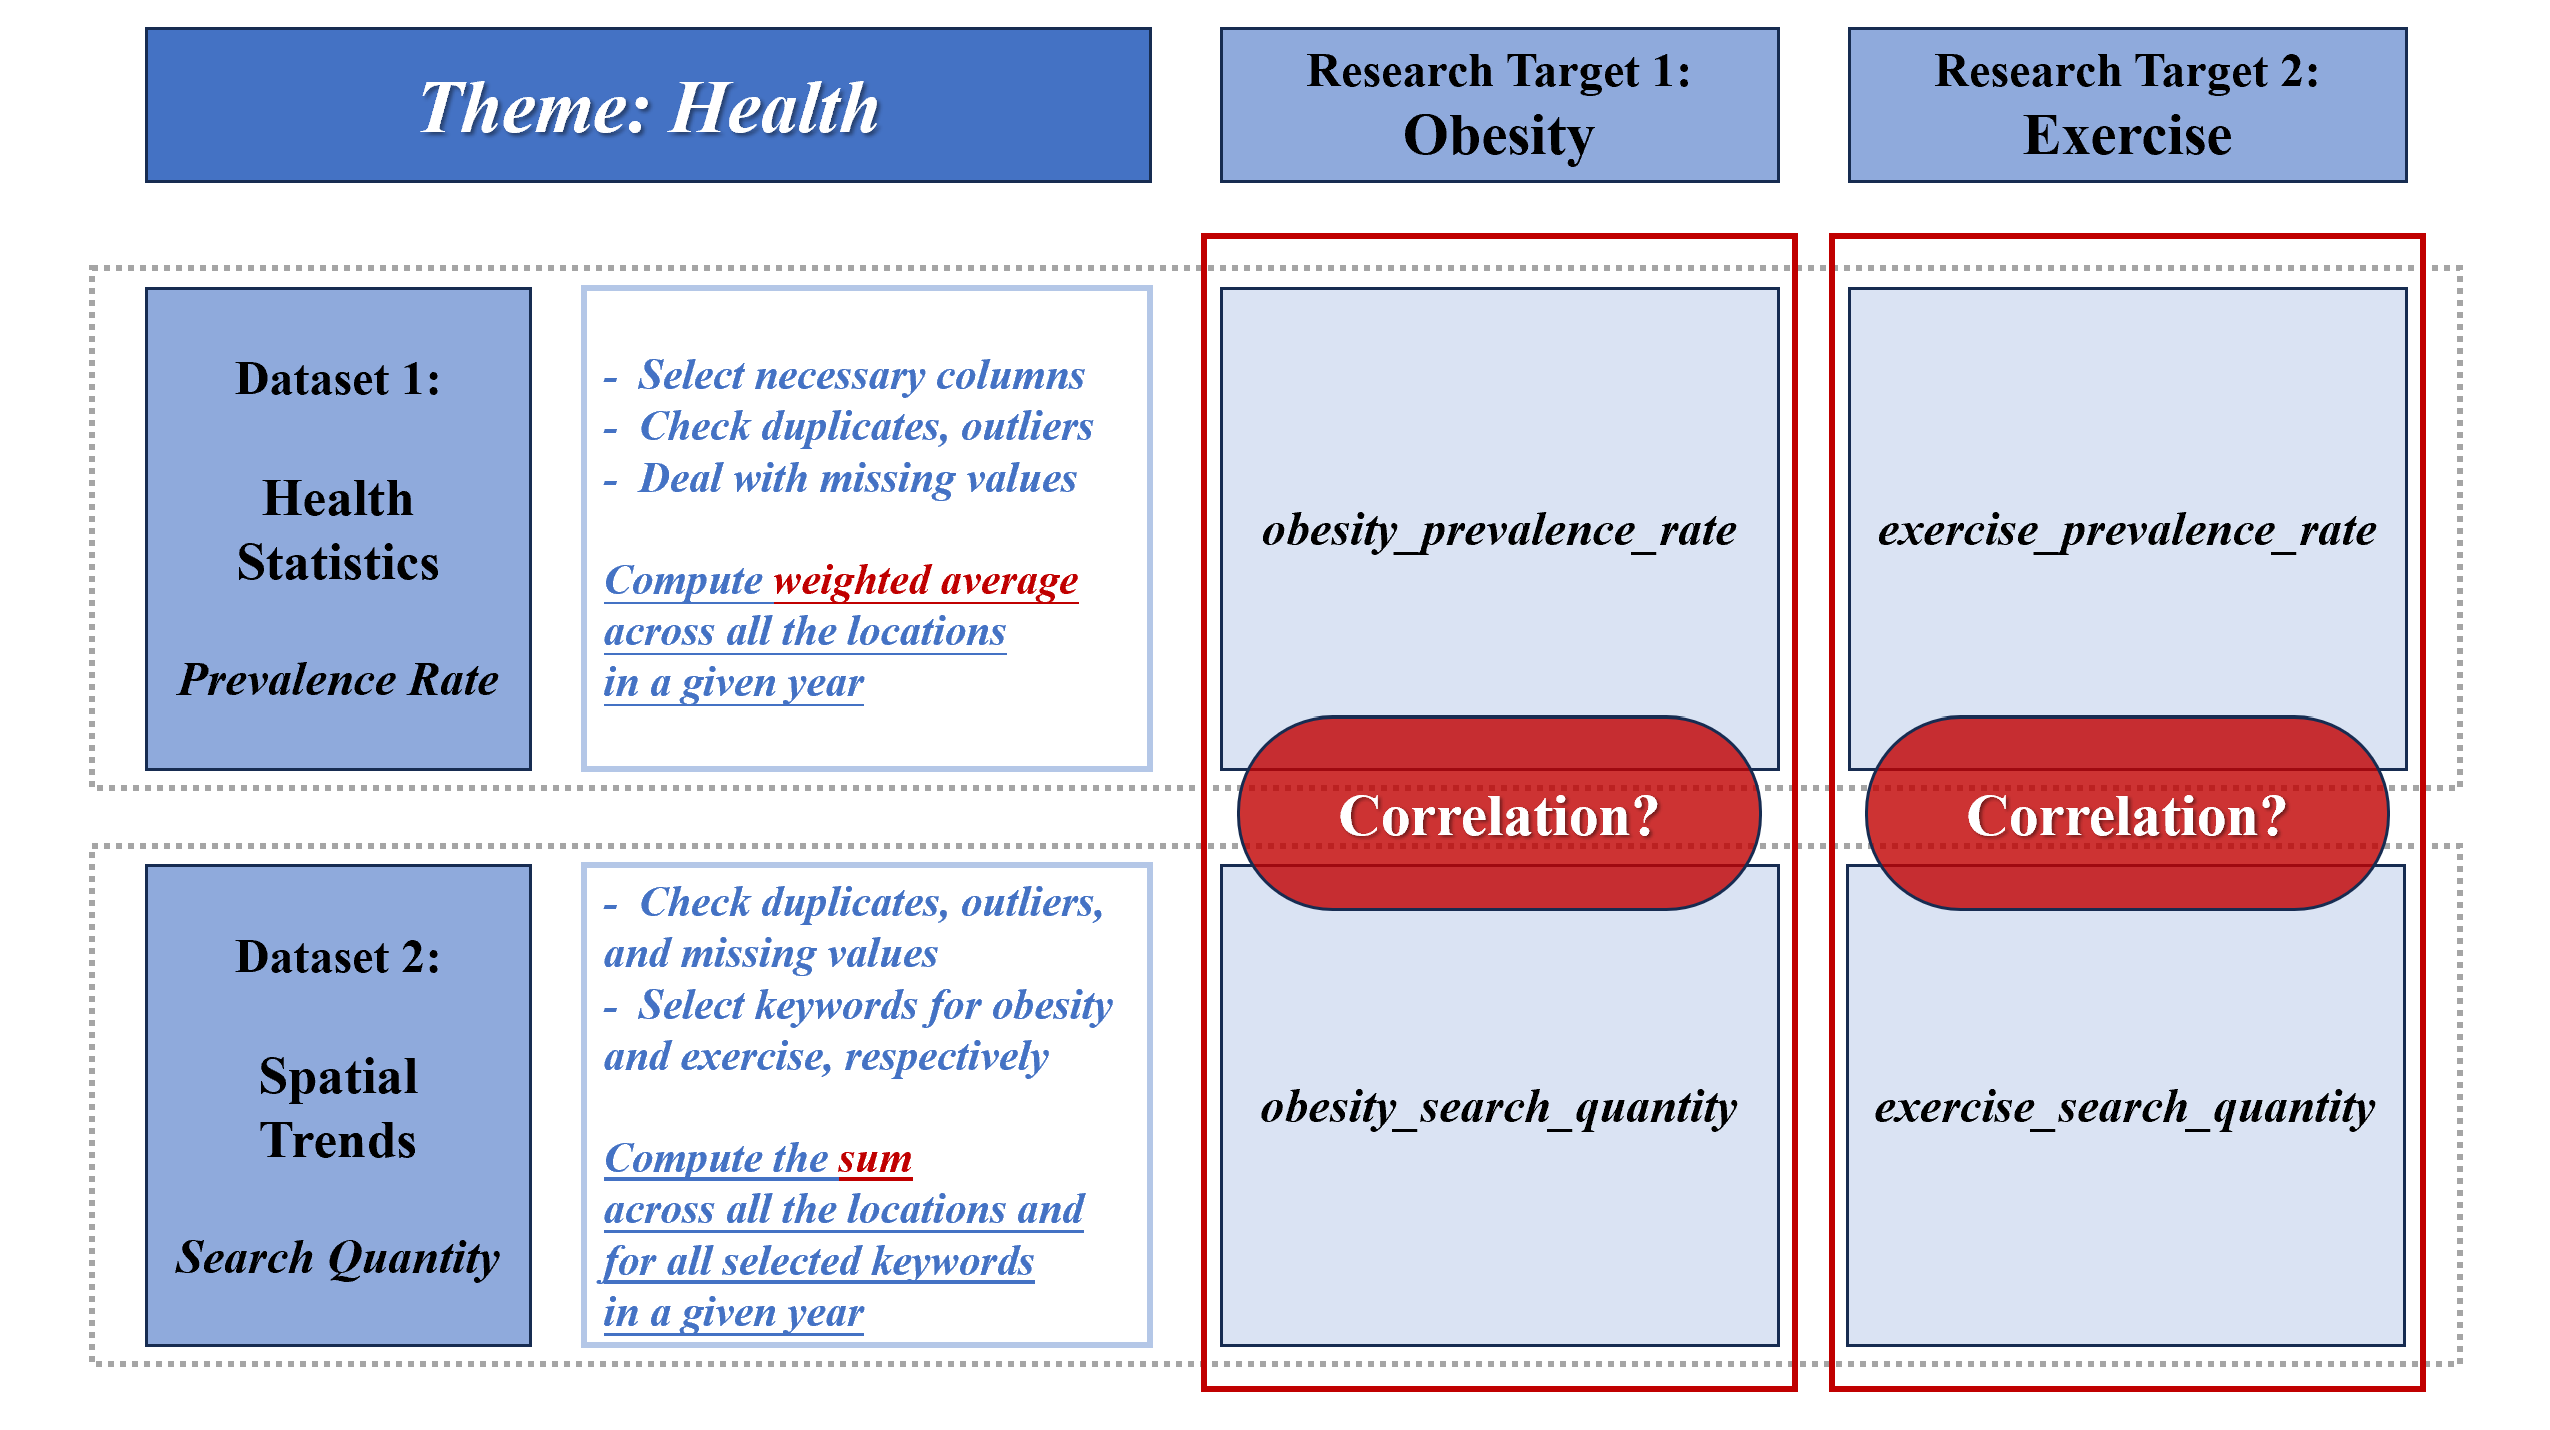

In [ ]:
from IPython.display import Image
image1 = "/content/drive/MyDrive/Applied DS Sean/milestones/milestone1/demonstration.png"
Image(image1)

As you can see, the ***variables*** are the **prevalence rates** and the **search quantities**, for **obesity** and **exercise**, respectively.

They are operationalized through the following processes:

*   The **prevalence rates for obesity and exercise** will be obtained, from the <u>Health Statistics</u> dataset, by computing the **weighted average** of the rates across all the states in the US in a given year.
*   To determine the **search quantities**, certain keywords representing **obesity** and **exercise** are selected from the <u>Spatial Search</u> dataset, then the appearences of all selected keywords are **summed** across all the states in the US in a given year.


# **3. Data Cleaning and Manipulation** #

In [ ]:
# Import all the libraries for future usage.
import numpy as np
import pandas as pd
import regex as re
import matplotlib.pyplot as plt
from scipy import stats

# Then, we will start with the outputs of Problem Set 5.
# We will load the two datasets (health and spatial) for further cleaning, manipulation, visualization, and statistical analysis.

In [ ]:
# Preview the "health" dataframe.
health_pathway = "/content/drive/MyDrive/Applied DS Sean/milestones/preprocessed_data/health_stats.csv"
health_df = pd.read_csv(health_pathway)
health_df

,Unnamed: 0,ID,Year,LocationAbbr,LocationDesc,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Stratification,StratificationType,variable
0,0,766058.0,2004.0,AL,Alabama,70.4,68.7,72.1,2449.0,Overall,Overall,exercise
1,1,766060.0,2004.0,AL,Alabama,73.3,70.5,76.1,886.0,Male,Gender,exercise
2,2,766061.0,2004.0,AL,Alabama,67.7,65.6,69.8,1563.0,Female,Gender,exercise
3,3,766064.0,2004.0,AL,Alabama,79.0,73.1,84.9,177.0,18-24,Age Group,exercise
4,4,766065.0,2004.0,AL,Alabama,74.8,70.4,79.2,397.0,25-34,Age Group,exercise
...,...,...,...,...,...,...,...,...,...,...,...,...
14437,14331,3376875.0,2018.0,PR,Puerto Rico,32.9,31.2,34.6,1511.0,Overall,Overall,obesity
14438,14332,3376893.0,2018.0,PR,Puerto Rico,33.1,30.3,35.9,595.0,Male,Gender,obesity
14439,14333,3376894.0,2018.0,PR,Puerto Rico,32.7,30.5,34.9,916.0,Female,Gender,obesity
14440,14334,3377695.0,2018.0,UW,All States and DC (median) **,30.9,NaN,NaN,51.0,Overall,Overall,obesity


In [ ]:
# Preview the "spatial" dataframe.
spatial_pathway = "/content/drive/MyDrive/Applied DS Sean/milestones/preprocessed_data/spatial_trends.csv"
spatial_df = pd.read_csv(spatial_pathway)
spatial_df

,Unnamed: 0,geoName,year,NIH,abdominal,aerobic exercise,apnea,best workout,bike helmet,bike laws,...,trainer,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga
0,0,Alabama,2004,8.0,67.0,43.0,62.0,35.0,18.0,0.0,...,77.0,26.0,38.0,28.0,20.0,31.0,79.0,41.0,78.0,28.0
1,1,Alaska,2004,2.0,100.0,0.0,42.0,38.0,0.0,0.0,...,65.0,13.0,37.0,60.0,59.0,46.0,65.0,33.0,75.0,44.0
2,2,Arizona,2004,5.0,69.0,25.0,37.0,10.0,8.0,47.0,...,80.0,30.0,23.0,31.0,27.0,16.0,72.0,33.0,76.0,72.0
3,3,Arkansas,2004,9.0,75.0,44.0,64.0,40.0,0.0,0.0,...,73.0,27.0,52.0,28.0,41.0,32.0,100.0,10.0,71.0,39.0
4,4,California,2004,9.0,56.0,16.0,35.0,13.0,11.0,58.0,...,69.0,34.0,36.0,32.0,16.0,24.0,50.0,32.0,66.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,760,Virginia,2018,15.0,75.0,58.0,91.0,82.0,51.0,43.0,...,92.0,68.0,73.0,72.0,71.0,80.0,81.0,38.0,89.0,49.0
761,761,Washington,2018,8.0,68.0,36.0,91.0,76.0,81.0,79.0,...,84.0,66.0,80.0,87.0,80.0,62.0,73.0,33.0,83.0,64.0
762,762,West Virginia,2018,8.0,100.0,63.0,95.0,91.0,42.0,0.0,...,75.0,78.0,99.0,47.0,74.0,74.0,97.0,32.0,78.0,32.0
763,763,Wisconsin,2018,7.0,76.0,57.0,84.0,76.0,59.0,49.0,...,83.0,67.0,91.0,74.0,71.0,70.0,71.0,44.0,82.0,49.0


### *3.1 For health statistics* ###

**Final data we want to get:**

prevalence rates for obesity and exercise in all the states(as a whole) with the overall stratification every year

**Methodology:**

Computing the weighted average of the rates across all the states in the US in a given year

**Work flow:**

1.   Drop unnecessary rows+columns, easy for further implementation
2.   Check & drop duplicates, outliers, NAs
3.   Filter out the cleaned dataframe with groups and calculate the weighted average of the rates



In [ ]:
health_df = pd.read_csv(health_pathway)
print(health_df.shape)

# ---------- Remove unnecesssary variables, as per requirement (3) ----------

# Firstly, drop unnecessary columns.
# Equivalently, keep: year, location, value, sample_size, stratification (types and details), and variable (obesity/excerise).
col_to_drop = ["Unnamed: 0", "ID", "LocationAbbr", "Low_Confidence_Limit", "High_Confidence_Limit"]
health_df.drop(col_to_drop, axis=1, inplace=True)

# Secondly, drop unnecessary rows (the ones that interfere with analysis).
row_to_drop = ["All States, DC and Territories (median) **", "All States and DC (median) **"]
condition = ~health_df['LocationDesc'].isin(row_to_drop)
health_df = health_df[condition]

# ---------- Check for duplicates, as per requirement (4) ----------

# Get the number of the duplicated rows in the "health" dataframe.
num_duplicates = health_df.duplicated().sum()

if num_duplicates > 0:
  print(f"Number of duplicate rows: {num_duplicates}.\n\n")
else:
  print("There are no duplicates in this dataset.")

# There are no duplicates in this dataset.

# ---------- Check for outliers, as per requirement (1) ----------

# Convert "Data_Value" from string to numeric, errors="coerce" will transform non-numeric values to NaN.
health_df["Data_Value"] = pd.to_numeric(health_df["Data_Value"], errors="coerce")

# Compute the interquartile range and hence the lower- and upper-bound for outliers.
Q1 = health_df["Data_Value"].quantile(0.25)
Q3 = health_df["Data_Value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = health_df[(health_df["Data_Value"] < lower_bound) | (health_df["Data_Value"] > upper_bound)]
if outliers.empty:
  print("There are no outliers in this dataset.")

# There are no outliers in this dataset.

# ---------- Show the processed result. ----------

print(health_df.shape)
health_df.head(20)

(14442, 12)
There are no duplicates in this dataset.
There are no outliers in this dataset.
(14382, 7)


,Year,LocationDesc,Data_Value,Sample_Size,Stratification,StratificationType,variable
0,2004.0,Alabama,70.4,2449.0,Overall,Overall,exercise
1,2004.0,Alabama,73.3,886.0,Male,Gender,exercise
2,2004.0,Alabama,67.7,1563.0,Female,Gender,exercise
3,2004.0,Alabama,79.0,177.0,18-24,Age Group,exercise
4,2004.0,Alabama,74.8,397.0,25-34,Age Group,exercise
5,2004.0,Alabama,70.7,434.0,35-44,Age Group,exercise
6,2004.0,Alabama,68.9,502.0,45-54,Age Group,exercise
7,2004.0,Alabama,70.6,436.0,55-64,Age Group,exercise
8,2004.0,Alabama,60.3,503.0,65+,Age Group,exercise
9,2004.0,Alaska,79.4,2086.0,Overall,Overall,exercise


In [ ]:
# ---------- Identify missing data and act accordingly, as per requirement (2) ----------

nan_rows = health_df[health_df.isna().any(axis=1)].sort_values(by=["LocationDesc", "Stratification", "Year"])
print(nan_rows.shape)
print("Out of the 14,382 rows, 39 rows have missing data, a proportion less than 0.3%.")

# print(nan_rows)

# After examining nan_rows dataframe, we think it is appropriate and legitimate to just remove the NaN rows
  # because they are of tiny proportion (less than 0.3%), relatively sparse, and
  # their removal does not introduce significant bias when we calculate the weighted average in the next step.
# On the other hand, filling backward/forward or replacing by mean will cause more bias
  # because the sample size changes over time and each state differs relatively significantly.

health_df.dropna(inplace=True)

# ---------- Transform the data (i), as per requirement (5) ----------

# For a given year (2004-2018) and stratification (overall/gender/age), and variable (exercise/obesity),
# Calculate the weighted average data_value ACROSS ALL GIVEN LOCATIONS.

# Define a function to calculate weighted average.
def weighted_average(group):
  d = group["Data_Value"]
  w = group["Sample_Size"]
  return (d * w).sum() / w.sum()

# Group by the necessary columns, and apply the weighted average calculation.
health_df = health_df.groupby(["variable", "Year", "Stratification", "StratificationType"]).apply(weighted_average).reset_index(name="weighted_average")

# ---------- Acquire more required data, as per requirement (6) ----------

# There are no other required data being missing or unavailable,
# So we do not need to use feature inference techniques or other means to acquire more data.

# ---------- Change the type of variable, as per requirement (7) ----------

# The "year" column does not contain NaN values, so it is safe to convert to integers.
health_df["Year"] = health_df["Year"].astype(int)

# ---------- Show the processed result. ----------

health_df

(39, 7)
Out of the 14,382 rows, 39 rows have missing data, a proportion less than 0.3%.


,variable,Year,Stratification,StratificationType,weighted_average
0,exercise,2004,18-24,Age Group,82.417155
1,exercise,2004,25-34,Age Group,81.080808
2,exercise,2004,35-44,Age Group,79.156670
3,exercise,2004,45-54,Age Group,77.510512
4,exercise,2004,55-64,Age Group,74.610506
...,...,...,...,...,...
265,obesity,2018,55-64,Age Group,35.597813
266,obesity,2018,65+,Age Group,29.256814
267,obesity,2018,Female,Gender,31.780845
268,obesity,2018,Male,Gender,31.222819


In [ ]:
# ---------- Transform the data (ii), as per requirement (5) ----------

# Firstly, divide the health_df by variable (obesity/exercise).
  # In other words, divide health_df into health_obesity_df and health_exercise_df.

# Filter rows where "variable" is "obesity" or "exercise", create a new independent dataframe.
health_obesity_df = health_df[health_df["variable"] == "obesity"].copy()
health_exercise_df = health_df[health_df["variable"] == "exercise"].copy()

# Rename the "weighted_average" column to "prevalence_rate" in the dataframes.
health_obesity_df.rename(columns={"weighted_average": "obesity_prevalence_rate"}, inplace=True)
health_exercise_df.rename(columns={"weighted_average": "exercise_prevalence_rate"}, inplace=True)

# Remove the now-redundant "variable" column from the dataframes.
health_obesity_df.drop(columns=["variable"], inplace=True)
health_exercise_df.drop(columns=["variable"], inplace=True)

# Reset the index of the dataframes after the row filtering, and drop the old index.
health_obesity_df.reset_index(drop=True, inplace=True)
health_exercise_df.reset_index(drop=True, inplace=True)

# Secondly, divide the datasets by stratification (overall/gender/age), for both obesity and exercise.
  # In other words, divide health_obesity_df into health_obesity_gender_df, health_obesity_age_df, and health_obesity_overall_df.
  # And repeat the process for health_exercise_df.

# Filter the DataFrame by "StratificationType".

health_obesity_gender_df = health_obesity_df[health_obesity_df["StratificationType"] == "Gender"].copy()
health_obesity_age_df = health_obesity_df[health_obesity_df["StratificationType"] == "Age Group"].copy()
health_obesity_overall_df = health_obesity_df[health_obesity_df["StratificationType"] == "Overall"].copy()

health_exercise_gender_df = health_exercise_df[health_exercise_df["StratificationType"] == "Gender"].copy()
health_exercise_age_df = health_exercise_df[health_exercise_df["StratificationType"] == "Age Group"].copy()
health_exercise_overall_df = health_exercise_df[health_exercise_df["StratificationType"] == "Overall"].copy()

# Remove the now-redundant "StratificationType" column from the dataframes.

health_obesity_gender_df.drop(columns=["StratificationType"], inplace=True)
health_obesity_age_df.drop(columns=["StratificationType"], inplace=True)
health_obesity_overall_df.drop(columns=["StratificationType"], inplace=True)

health_exercise_gender_df.drop(columns=["StratificationType"], inplace=True)
health_exercise_age_df.drop(columns=["StratificationType"], inplace=True)
health_exercise_overall_df.drop(columns=["StratificationType"], inplace=True)

# Set "Stratification" as the index.

health_obesity_gender_df.set_index("Stratification", inplace=True)
health_obesity_age_df.set_index("Stratification", inplace=True)
health_obesity_overall_df.set_index("Stratification", inplace=True)

health_exercise_gender_df.set_index("Stratification", inplace=True)
health_exercise_age_df.set_index("Stratification", inplace=True)
health_exercise_overall_df.set_index("Stratification", inplace=True)

# Sort the dataframes based on "Year".

order = ["Year", "Stratification"]
# You can change the order if you want to first display the stratification then the year.

health_obesity_gender_df.sort_values(by=order, inplace=True)
health_obesity_age_df.sort_values(by=order, inplace=True)
health_obesity_overall_df.sort_values(by=order, inplace=True)

health_exercise_gender_df.sort_values(by=order, inplace=True)
health_exercise_age_df.sort_values(by=order, inplace=True)
health_exercise_overall_df.sort_values(by=order, inplace=True)

In [ ]:
print(health_obesity_gender_df.shape)
print(health_obesity_gender_df.head(6))
print()
print(health_obesity_age_df.shape)
print(health_obesity_age_df.head(6))
print()
print(health_obesity_overall_df.shape)
print(health_obesity_overall_df.head(6))

(30, 2)
                Year  obesity_prevalence_rate
Stratification                               
Female          2004                23.011271
Male            2004                23.766772
Female          2005                24.333376
Male            2005                25.129562
Female          2006                24.541332
Male            2006                25.786885

(90, 2)
                Year  obesity_prevalence_rate
Stratification                               
18-24           2004                14.403034
25-34           2004                22.912173
35-44           2004                25.341457
45-54           2004                27.231984
55-64           2004                29.032289
65+             2004                20.449601

(15, 2)
                Year  obesity_prevalence_rate
Stratification                               
Overall         2004                23.377407
Overall         2005                24.677060
Overall         2006                25.128822
Overall 

In [ ]:
print(health_exercise_gender_df.shape)
print(health_exercise_gender_df.head(6))
print()
print(health_exercise_age_df.shape)
print(health_exercise_age_df.head(6))
print()
print(health_exercise_overall_df.shape)
print(health_exercise_overall_df.head(6))

(30, 2)
                Year  exercise_prevalence_rate
Stratification                                
Female          2004                 75.151690
Male            2004                 79.309017
Female          2005                 73.806316
Male            2005                 78.075052
Female          2006                 75.040607
Male            2006                 79.062062

(90, 2)
                Year  exercise_prevalence_rate
Stratification                                
18-24           2004                 82.417155
25-34           2004                 81.080808
35-44           2004                 79.156670
45-54           2004                 77.510512
55-64           2004                 74.610506
65+             2004                 68.285294

(15, 2)
                Year  exercise_prevalence_rate
Stratification                                
Overall         2004                 77.153826
Overall         2005                 75.856127
Overall         2006              

### *3.2 For Spatial Trends* ###

In [ ]:
spatial_df = pd.read_csv(spatial_pathway)
print(spatial_df.shape)

# ---------- Check for duplicates, as per requirement (4) ----------

# Get the number of the duplicated rows in the "health" dataframe.
num_duplicates = spatial_df.duplicated().sum()

if num_duplicates > 0:
  print(f"Number of duplicate rows: {num_duplicates}.\n\n")
else:
  print("There are no duplicates in this dataset.")

# There are no duplicates in this dataset.

# ---------- Identify missing data and act accordingly, as per requirement (2) ----------

cols_to_check = spatial_df.columns[3:]
for col in cols_to_check:
  spatial_df[col] = pd.to_numeric(spatial_df[col], errors="coerce")
nan_rows = spatial_df[spatial_df.isna().any(axis=1)]
print(nan_rows.shape)
print("Out of the 765 rows, no rows have missing data.")

(765, 84)
There are no duplicates in this dataset.
(0, 84)
Out of the 765 rows, no rows have missing data.


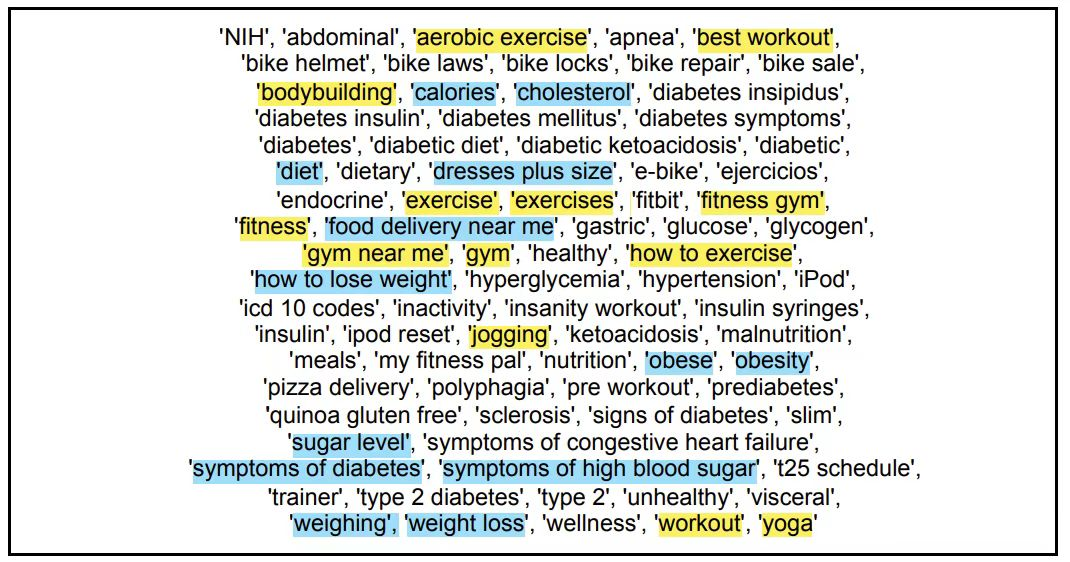

In [ ]:
image2 = "/content/drive/MyDrive/Applied DS Sean/milestones/milestone1/keyword.jpg"
Image(image2)

In [ ]:
# ---------- Select necessary variables, as per requirement (3) ----------

# Divide spatial_df into spatial_obesity_df and spatial_exercise_df.

# We select 13 words each (a total of 26) out of the 81 key words to represent exercise and obesity, respectively.
obesity_list = ["calories", "cholesterol", "diet", "dresses plus size", "food delivery near me", "how to lose weight", "obese", "obesity", "sugar level", "symptoms of diabetes", "symptoms of high blood sugar", "weighing", "weight loss"]
exercise_list = ["aerobic exercise", "best workout", "bodybuilding", "exercise", "exercises", "fitness gym", "fitness", "gym near me", "gym", "how to exercise", "jogging", "workout", "yoga"]

spatial_obesity_df = spatial_df.iloc[:, 1:3].join(spatial_df[obesity_list])
spatial_exercise_df = spatial_df.iloc[:, 1:3].join(spatial_df[exercise_list])

# ---------- Show the processed result. ----------

spatial_obesity_df
# spatial_exercise_df is not displayed here, but the format and the gist are the same.

,geoName,year,calories,cholesterol,diet,dresses plus size,food delivery near me,how to lose weight,obese,obesity,sugar level,symptoms of diabetes,symptoms of high blood sugar,weighing,weight loss
0,Alabama,2004,70.0,84.0,87.0,10.0,0.0,37.0,54.0,71.0,19.0,39.0,0.0,31.0,79.0
1,Alaska,2004,81.0,46.0,87.0,39.0,0.0,47.0,49.0,47.0,0.0,45.0,0.0,46.0,65.0
2,Arizona,2004,74.0,61.0,70.0,8.0,0.0,31.0,53.0,49.0,15.0,18.0,0.0,16.0,72.0
3,Arkansas,2004,73.0,87.0,87.0,42.0,0.0,44.0,35.0,71.0,29.0,32.0,0.0,32.0,100.0
4,California,2004,77.0,63.0,59.0,11.0,0.0,32.0,39.0,48.0,12.0,21.0,10.0,24.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,Virginia,2018,91.0,86.0,86.0,41.0,79.0,74.0,75.0,76.0,65.0,55.0,51.0,80.0,81.0
761,Washington,2018,93.0,74.0,87.0,28.0,46.0,68.0,77.0,64.0,64.0,55.0,49.0,62.0,73.0
762,West Virginia,2018,90.0,100.0,99.0,60.0,49.0,100.0,100.0,78.0,88.0,61.0,92.0,74.0,97.0
763,Wisconsin,2018,90.0,77.0,83.0,40.0,64.0,73.0,78.0,71.0,62.0,55.0,31.0,70.0,71.0


In [ ]:
# We think we should not remove or adjust for outliers because
  # Firstly, it is commonplace to encounter outliers in search quantity data,
    # as these figures can vary substantially over time and across different locations;
  # Secondly, given that all the data points are authentic,
    # it does not make sense to selectively retain certain data while excluding others.
# Nevertheless, we have written the function to identify the outliers, as shown below.

# ---------- Check for outliers, as per requirement (1) ----------

def identify_outliers(df):
  """
  Identify outliers in each column from the third one to the last in a DataFrame.
  Parameters: df: The DataFrame to check for outliers.
  Returns: dict: A dictionary where keys are column names and values are DataFrames containing outliers.
  """
  subset_df = df.iloc[:, 2:]

  # Dictionary to store outlier information
  outliers_dict = {}

  # Checking each column for outliers
  for column in subset_df.columns:

    # Skip non-numeric columns
    if not np.issubdtype(df[column].dtype, np.number):
      print(f"Skipping non-numeric column: {column}")
      continue

    Q1 = subset_df[column].quantile(0.25)
    Q3 = subset_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outlier values
    outliers = subset_df[(subset_df[column] < lower_bound) | (subset_df[column] > upper_bound)].copy()
    if not outliers.empty:
      outliers['OutlierReason'] = np.where(outliers[column] < lower_bound, 'Below lower bound', 'Above upper bound')

    # Storing the outliers in the dictionary
    outliers_dict[column] = outliers

  return outliers_dict

# Apply the function

# identify_outliers(spatial_obesity_df)
# identify_outliers(spatial_exercise_df)

In [ ]:
# ---------- Transform the data (i), as per requirement (5) ----------

# For a given year (2004-2018), for obesity/exercise， respectively,
# Add search appearances FOR ALL SELECTED KEYWORDS and ACROSS ALL GIVEN LOCATIONS.

def sum_spatial(df, header):
  # Across all given locations:
  sum_col_df = df.groupby("year")[df.columns[2:]].sum() # Sum within a column
  # For all selected keep words:
  sum_row_df = sum_col_df.groupby("year").sum() # Sum across columns
  sum_row_df[header] = sum_row_df.sum(axis=1)
  sum_row_df = sum_row_df[header] # Keep only the sum
  # Reset the index so 'year' is a column again, rather than an index.
  result_df = sum_row_df.reset_index()
  return result_df

spatial_obesity_df = sum_spatial(spatial_obesity_df, "obesity_search_quantity")
spatial_exercise_df = sum_spatial(spatial_exercise_df, "exercise_search_quantity")

# ---------- Acquire more required data, as per requirement (6) ----------

# There are no other required data being missing or unavailable,
# So we do not need to use feature inference techniques or other means to acquire more data.

# ---------- Show the processed result. ----------

spatial_exercise_df
# spatial_obesity_df is not displayed here, but the format and the gist are the same.

,year,exercise_search_quantity
0,2004,34835.0
1,2005,35778.0
2,2006,36667.0
3,2007,38056.0
4,2008,39065.0
5,2009,40271.0
6,2010,43077.0
7,2011,44384.0
8,2012,43888.0
9,2013,45186.0


In [ ]:
# ---------- Transform the data (ii), as per requirement (5) ----------

# Merge the prevalence rate (from health statistics) and the search quantity (from spatial trends) on the years,
# For obesity and exercise, respectively.

health_obesity_df = health_obesity_overall_df.reset_index()
health_obesity_df.drop("Stratification", axis=1, inplace=True)
health_obesity_df.rename(columns=str.lower, inplace=True)

health_exercise_df = health_exercise_overall_df.reset_index()
health_exercise_df
health_exercise_df.drop("Stratification", axis=1, inplace=True)
health_exercise_df.rename(columns=str.lower, inplace=True)

merged_df = health_obesity_df.merge(health_exercise_df, on="year").merge(spatial_obesity_df, on="year").merge(spatial_exercise_df, on="year")

# ---------- Change the type of variable, as per requirement (7) ----------

# The search_quantity columns do not contain NaN values, so it is safe to convert to integers.
merged_df[["obesity_search_quantity", "exercise_search_quantity"]] = merged_df[["obesity_search_quantity", "exercise_search_quantity"]].astype(int)

# ---------- Show the processed result. ----------

merged_df.set_index('year', inplace=True)
merged_df

,obesity_prevalence_rate,exercise_prevalence_rate,obesity_search_quantity,exercise_search_quantity
year,,,,
2004,23.377407,77.153826,29271,34835
2005,24.677060,75.856127,33202,35778
2006,25.128822,76.969257,35280,36667
2007,26.297208,76.856974,36117,38056
2008,26.866930,75.326985,37676,39065
2009,27.723704,76.014611,38854,40271
2010,27.848215,76.282480,39941,43077
2011,27.773857,74.565338,40788,44384
2012,28.200806,77.216170,43224,43888


# **4. Data Visualization** #

### *4.1 Overall Obesity Prevalence Rate Over Time*

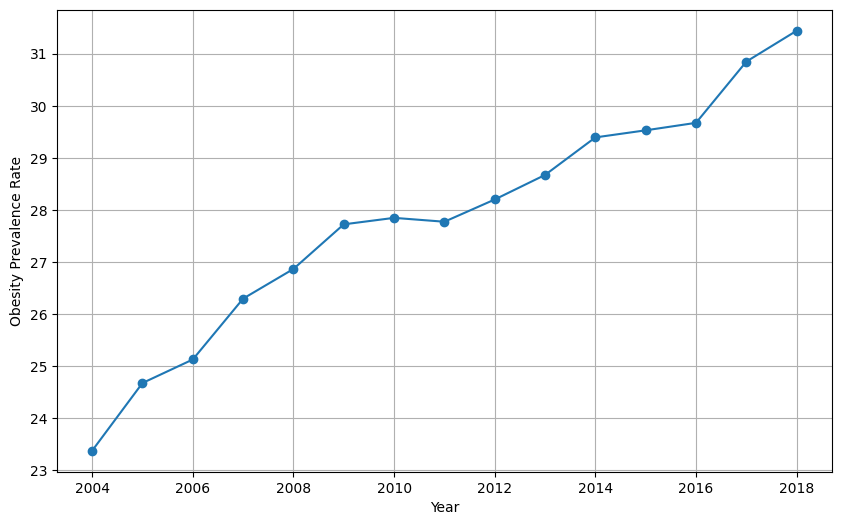

In [ ]:
# Ensure the "Year" column is numeric
health_obesity_overall_df['Year'] = pd.to_numeric(health_obesity_overall_df['Year'])

# Extract the data for the line plot
obesity_prevalence = health_obesity_overall_df['obesity_prevalence_rate']
years = health_obesity_overall_df['Year']

# Create a line plot with exercise_prevalence_rate on the y-axis and year on the x-axis
plt.figure(figsize=(10, 6))
plt.plot(years, obesity_prevalence, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Obesity Prevalence Rate')
plt.grid(True)

plt.show()

### *4.2 Overall Exercise Prevalence Rate Over Time*

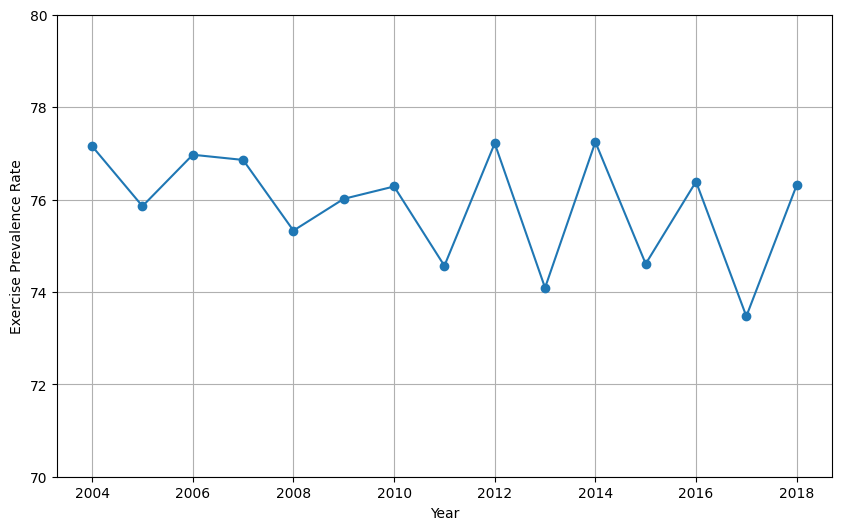

In [ ]:
# Ensure the "Year" column is numeric.
health_exercise_overall_df['Year'] = pd.to_numeric(health_exercise_overall_df['Year'])

# Extract the data for the line plot.
exercise_prevalence = health_exercise_overall_df['exercise_prevalence_rate']
years = health_exercise_overall_df['Year']

# Create a line plot.
plt.figure(figsize=(10, 6))
plt.plot(years, exercise_prevalence, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Exercise Prevalence Rate')
plt.grid(True)

# Set the y-axis range, so that we do not over-exaggerate the fluctionation.
plt.ylim(70, 80)

plt.show()

###*4.3 Obesity Prevalence Rate for Females and Males by Year*

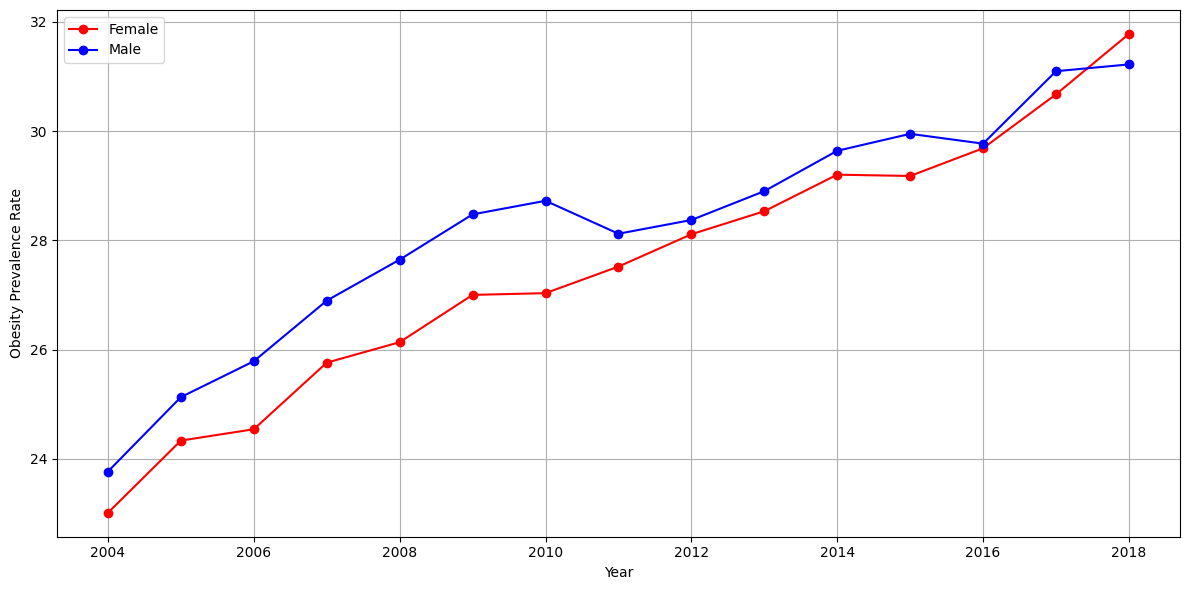

In [ ]:
# Filter the data for males and females.
health_obesity_gender_female = health_obesity_gender_df.loc['Female']
health_obesity_gender_male = health_obesity_gender_df.loc['Male']

plt.figure(figsize=(12, 6))

# Plot obesity prevalence rate for males in blue and females in red.
plt.plot(health_obesity_gender_female['Year'], health_obesity_gender_female['obesity_prevalence_rate'], marker='o', linestyle='-', label='Female', color='red')
plt.plot(health_obesity_gender_male['Year'], health_obesity_gender_male['obesity_prevalence_rate'], marker='o', linestyle='-', label='Male', color='blue')

# Create a line plot.
plt.xlabel('Year')
plt.ylabel('Obesity Prevalence Rate')
plt.grid(True)
plt.legend(loc = "best")

plt.tight_layout()
plt.show()

###*4.4 Exercise Prevalence Rate for Females and Males by Year*

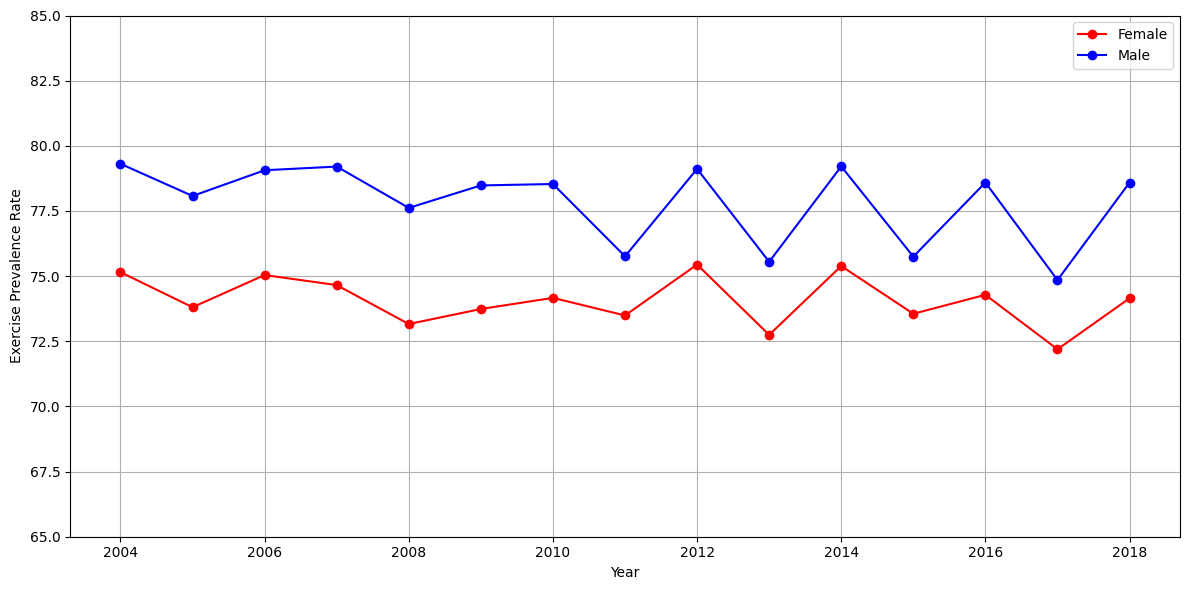

In [ ]:
# Filter the data for males and females.
health_exercise_gender_female = health_exercise_gender_df.loc['Female']
health_exercise_gender_male = health_exercise_gender_df.loc['Male']

plt.figure(figsize=(12, 6))

# Plot obesity prevalence rate for males in blue and females in red.
plt.plot(health_exercise_gender_female['Year'], health_exercise_gender_female['exercise_prevalence_rate'], marker='o', linestyle='-', label='Female', color='red')
plt.plot(health_exercise_gender_male['Year'], health_exercise_gender_male['exercise_prevalence_rate'], marker='o', linestyle='-', label='Male', color='blue')

# Create a line plot.
plt.xlabel('Year')
plt.ylabel('Exercise Prevalence Rate')
plt.grid(True)
plt.legend(loc = "best")
plt.ylim(65, 85)

# Show the plot.
plt.tight_layout()
plt.show()

# **5. Statistical Analysis** #

In [ ]:
# ---------- Normalize the data, as per requirement (5) ----------

# Define a function to use max-min normalization.
def mean_normalize(column):
  return (column - column.mean()) / (column.max()-column.min())
# Apply the function to merged_df and hence create normalized_df.
normalized_df = merged_df.apply(mean_normalize)
normalized_df

,obesity_prevalence_rate,exercise_prevalence_rate,obesity_search_quantity,exercise_search_quantity
year,,,,
2004,-0.552180,0.335001,-0.660534,-0.590551
2005,-0.391008,-0.009045,-0.418328,-0.514996
2006,-0.334984,0.286068,-0.290294,-0.443768
2007,-0.190091,0.256300,-0.238723,-0.332479
2008,-0.119438,-0.149331,-0.142666,-0.251636
2009,-0.013188,0.032972,-0.070084,-0.155009
2010,0.002252,0.103990,-0.003109,0.069813
2011,-0.006969,-0.351259,0.049078,0.174532
2012,0.045978,0.351530,0.199170,0.134792


In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value.
obesity_correlation, obesity_p_value = pearsonr(normalized_df["obesity_prevalence_rate"], normalized_df["obesity_search_quantity"])
exercise_correlation, exercise_p_value = pearsonr(normalized_df["exercise_prevalence_rate"], normalized_df["exercise_search_quantity"])

# Print the result of the correlation, with coefficient and p-value.
print("For obesity:")
print("Correlation coefficient:", obesity_correlation)
print("P-value:", obesity_p_value)
print()
print("For exercise:")
print("Correlation coefficient:", exercise_correlation)
print("P-value:", exercise_p_value)

For obesity:
Correlation coefficient: 0.9687156603600564
P-value: 3.0224607041820628e-09

For exercise:
Correlation coefficient: -0.44639231148562347
P-value: 0.09532335238179272


In [ ]:
alpha = 0.05  # A commonly-used p-value threshold

p_value_dict={"obesity": obesity_p_value, "exercise":exercise_p_value}

# Display the result of the significance testing.
for k,v in p_value_dict.items():
  if v < alpha:
    print(f"The difference between pairs for {k} is statistically significant, p={v:.4e}")
  else:
    print(f"The difference between pairs for {k} is not statistically significant, p={v:.4e}")

The difference between pairs for obesity is statistically significant, p=3.0225e-09
The difference between pairs for exercise is not statistically significant, p=9.5323e-02
